In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
sns.set(rc={"figure.dpi":70, 'savefig.dpi':70}) #defining dpi setting
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
dfes = pd.read_csv('../Maysville_multi_quan.csv')
dfes['FID_RiverRd_AOI'] = np.where(dfes['NWI']=='wetland', 1, 0)
#dfes['NWI'] = np.where(dfes['NWI']=='wetland', 'wetland', 'nonwetland')


In [6]:
def jpt(dfes, x, y, hue, title):
    g = sns.jointplot(data=dfes, x=x, y=y, hue=hue)
    g.fig.suptitle(title)
    return g

C:\Users\shiti\anaconda3\lib\site-packages\seaborn\axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


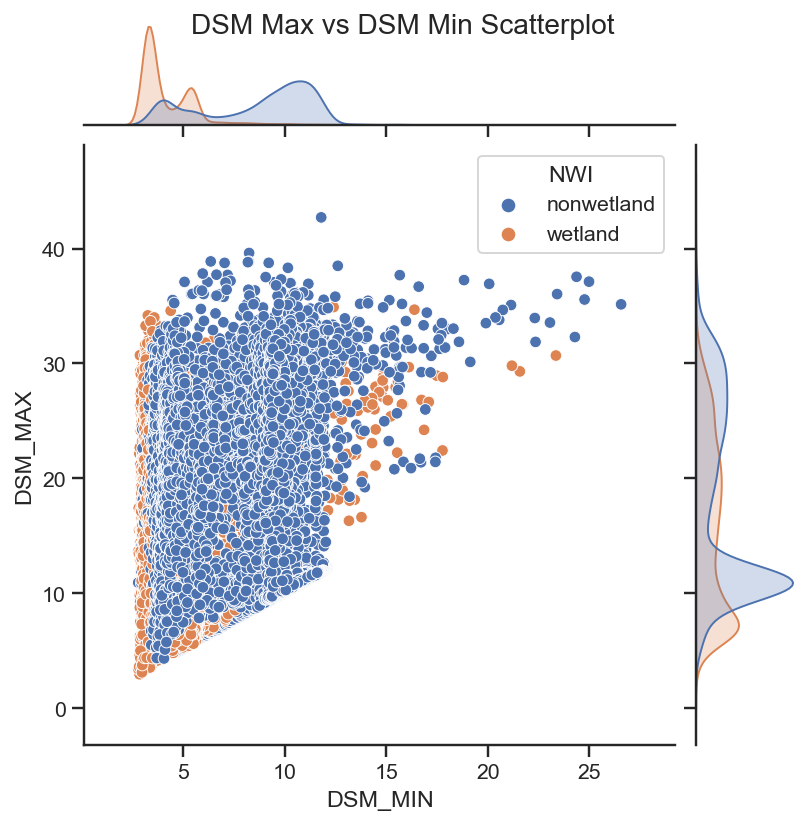

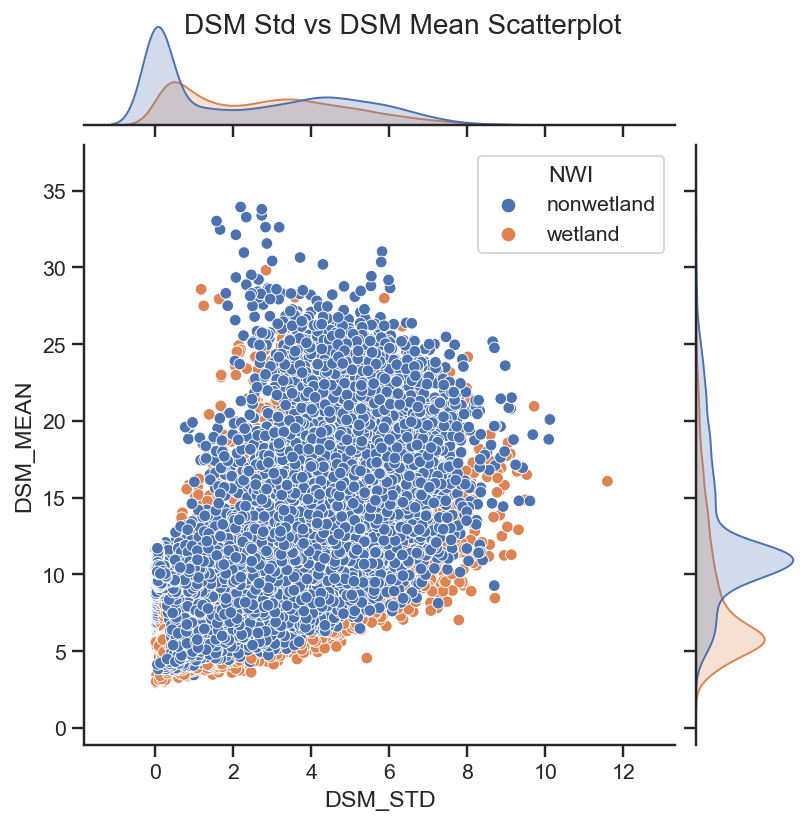

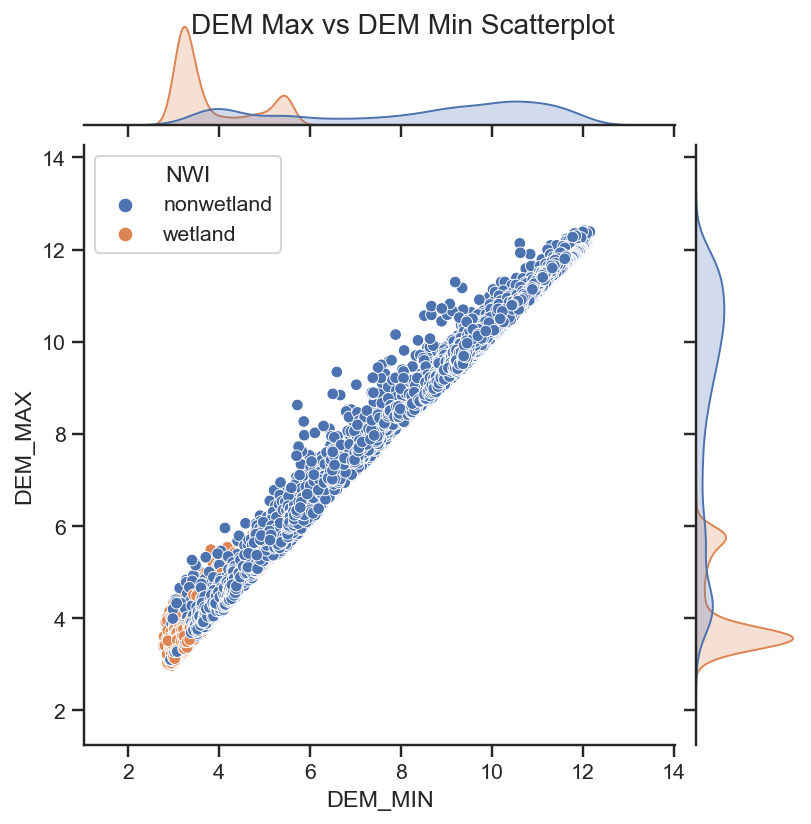

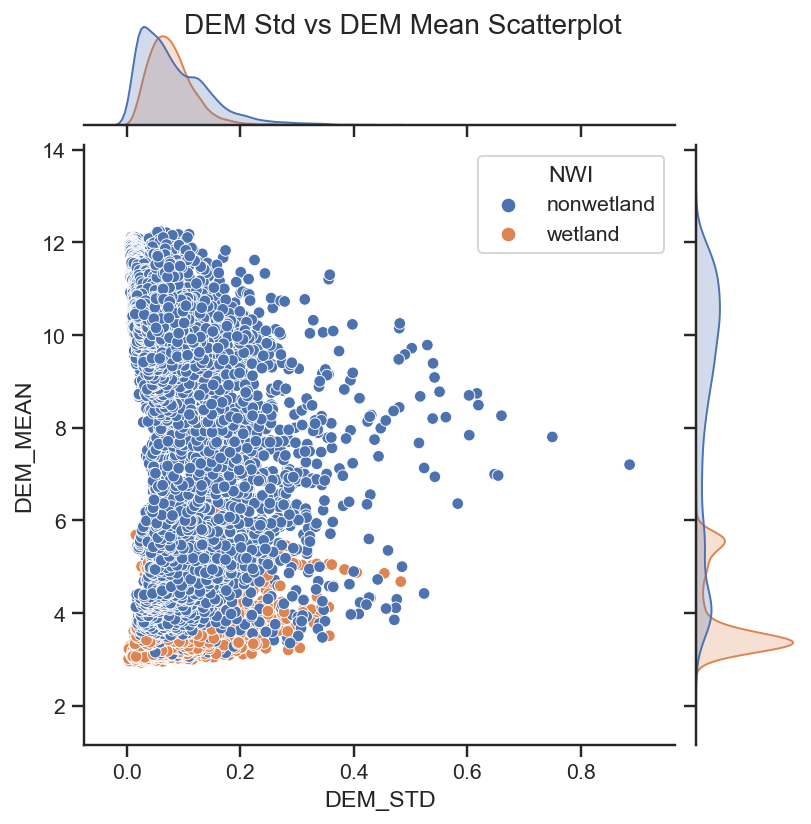

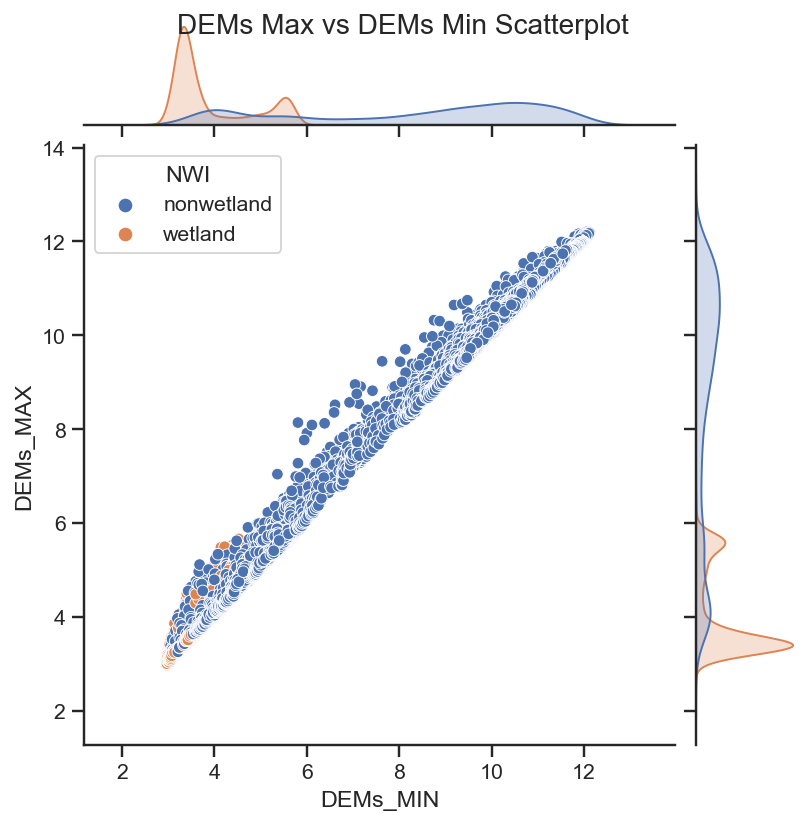

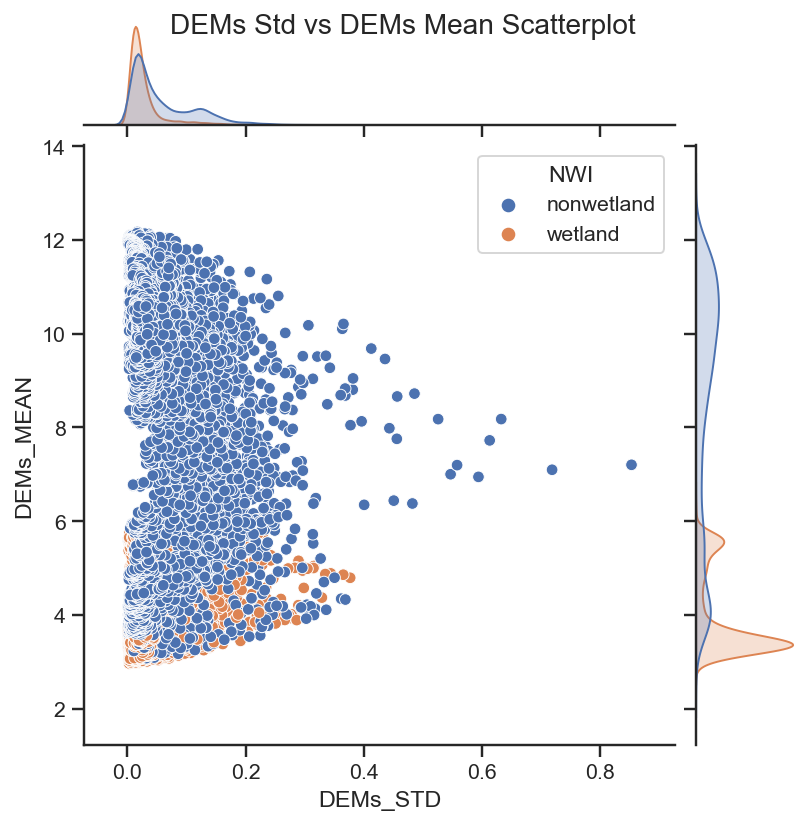

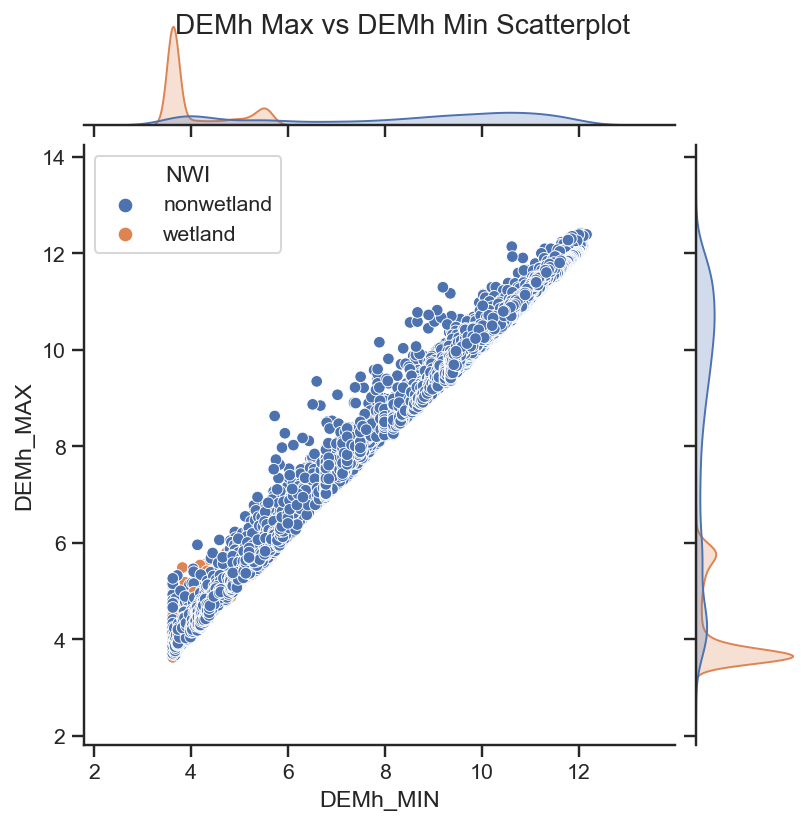

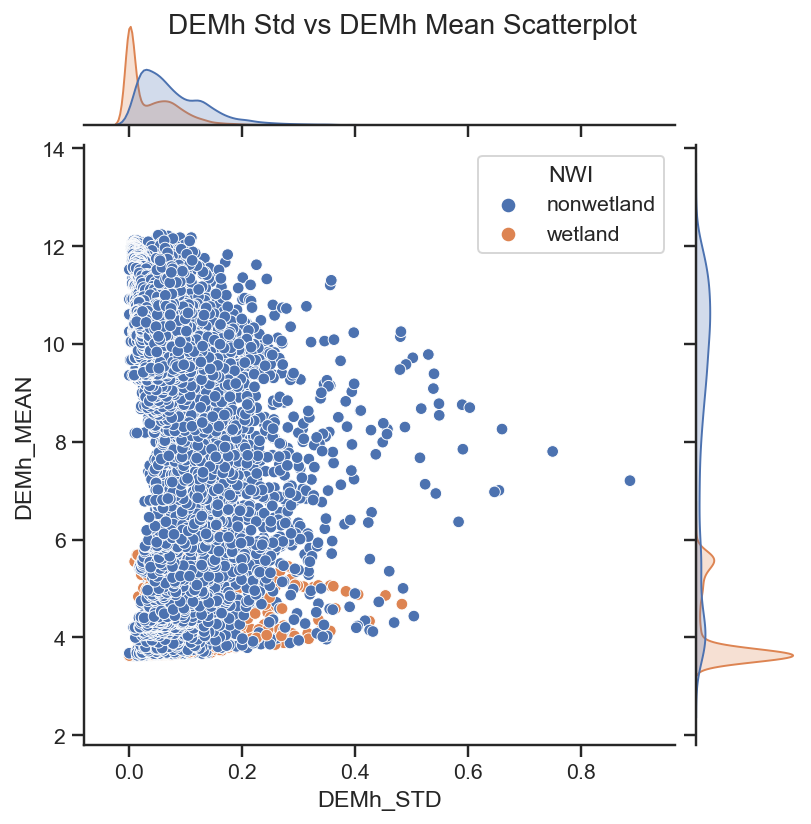

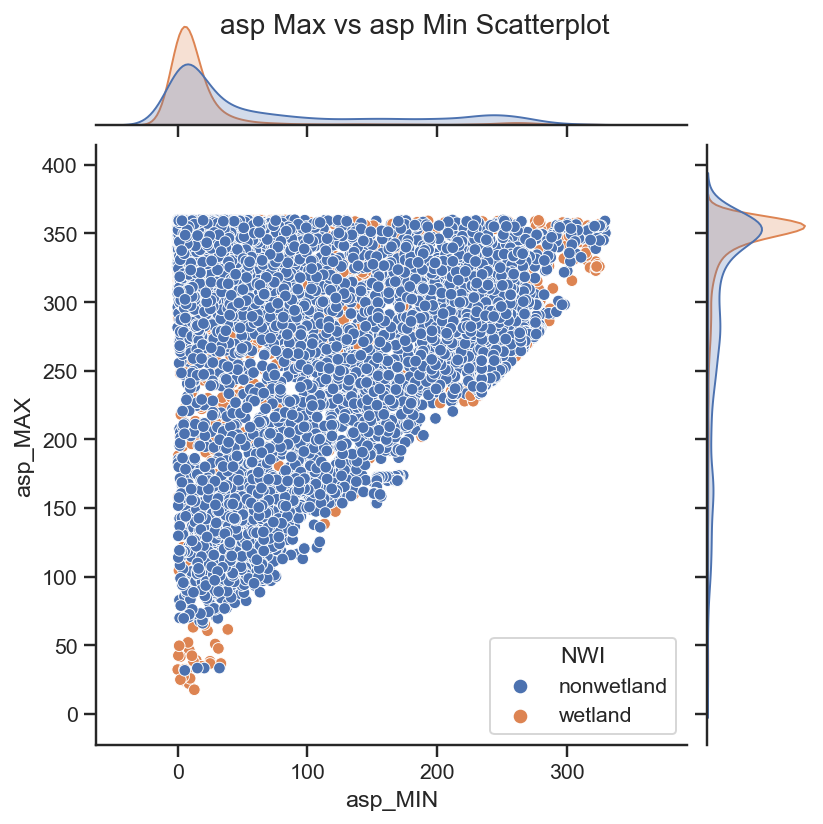

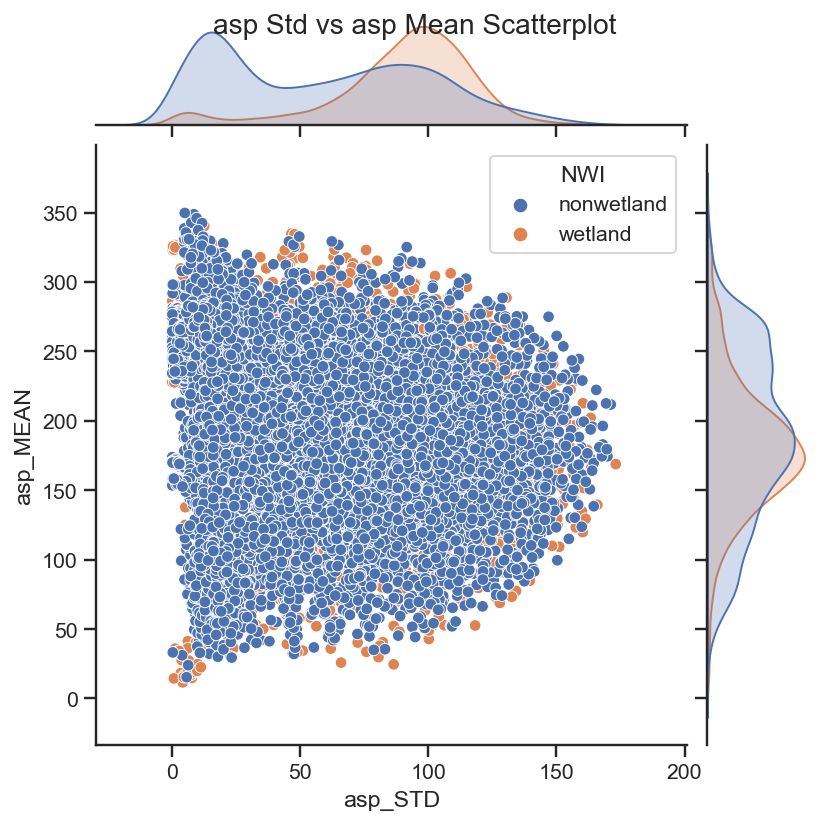

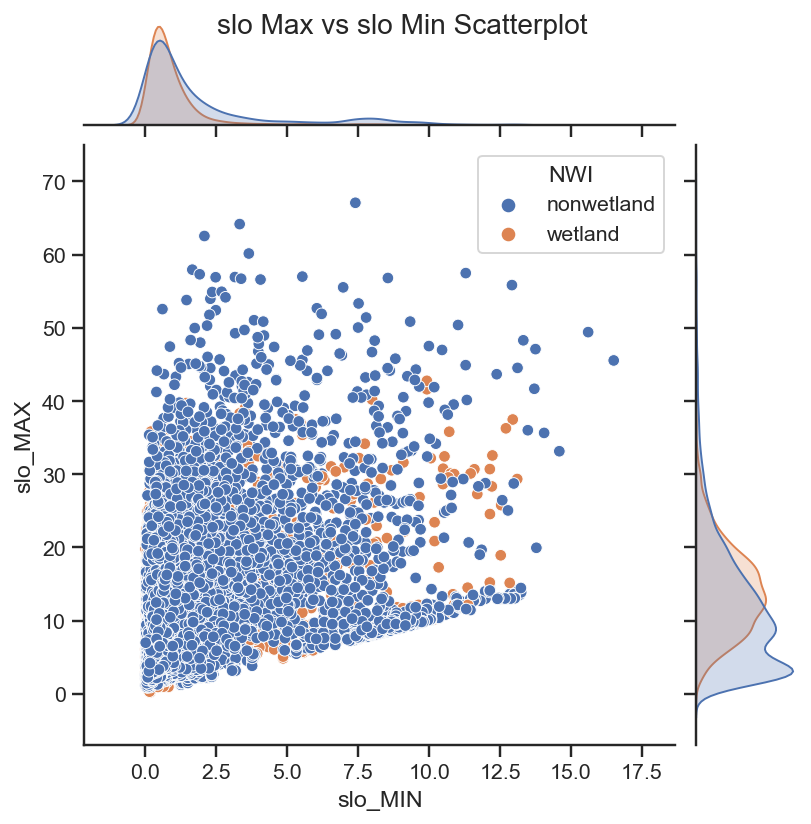

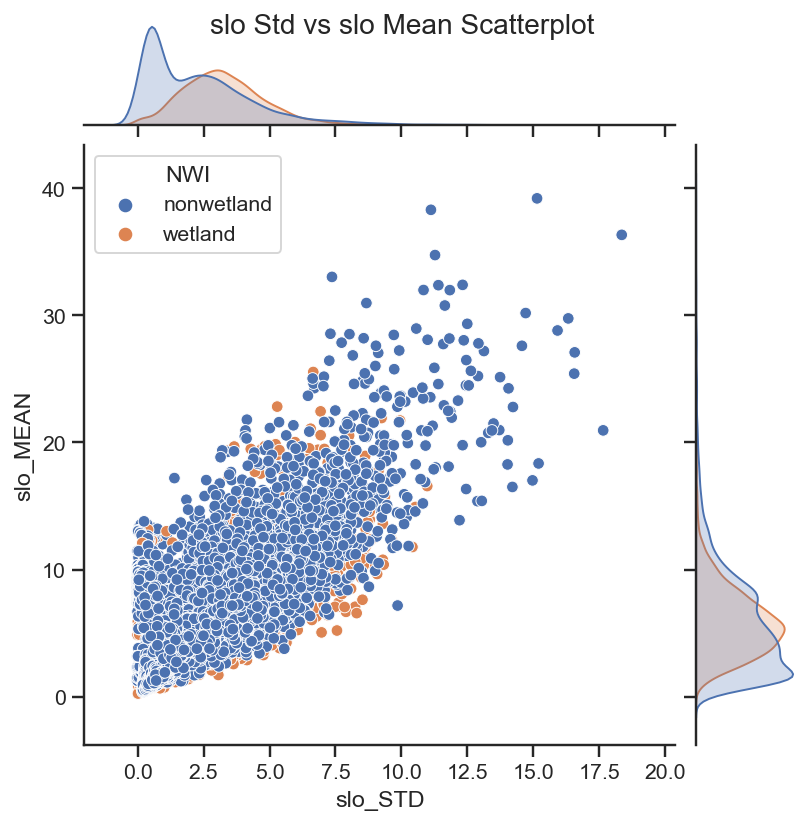

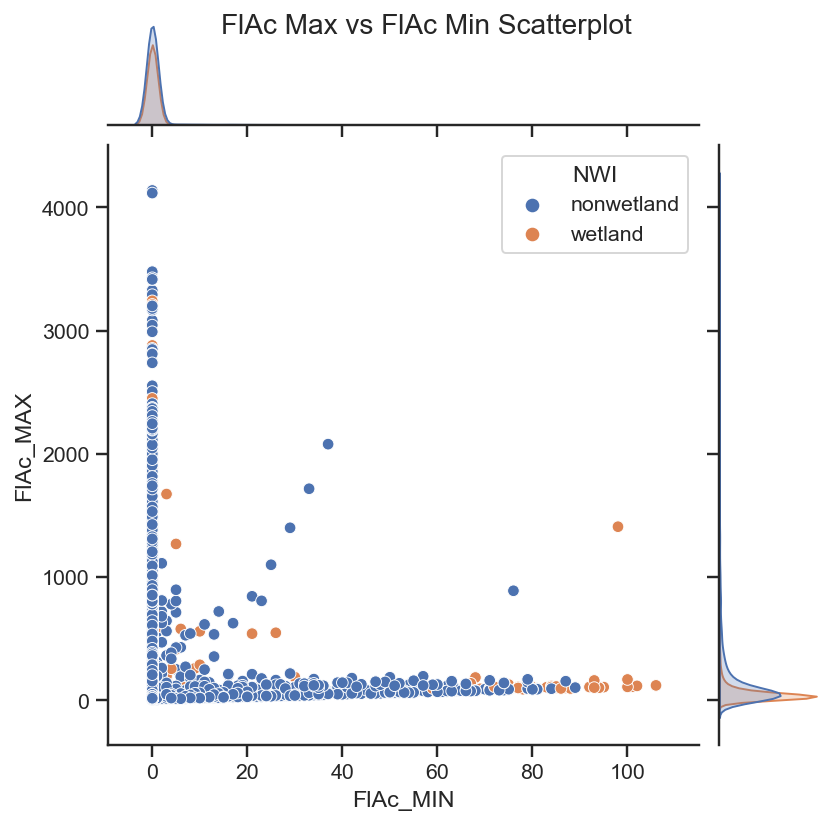

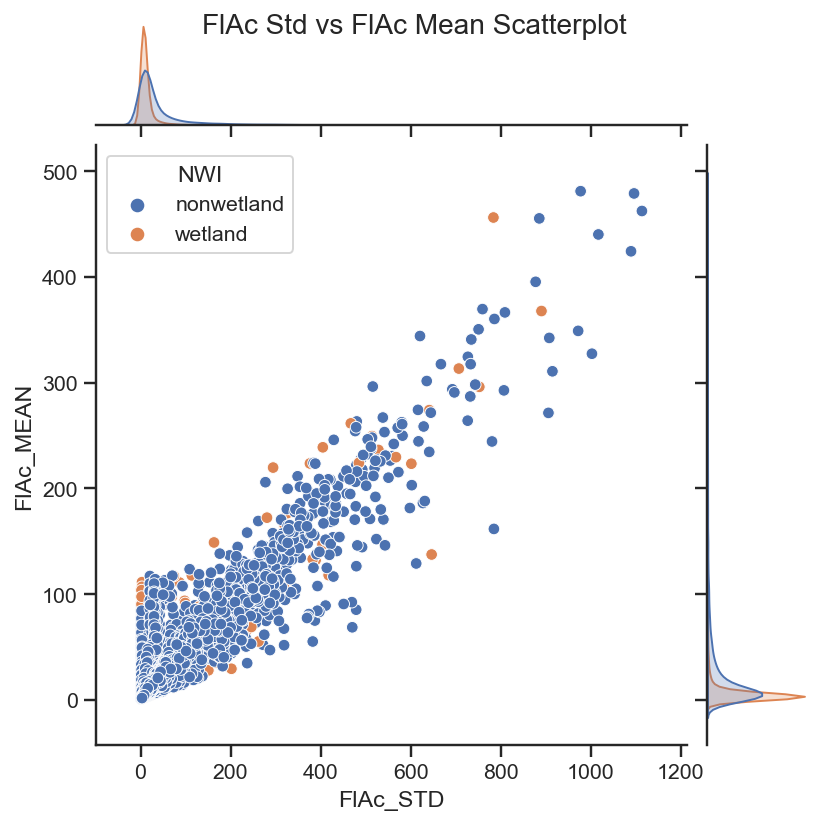

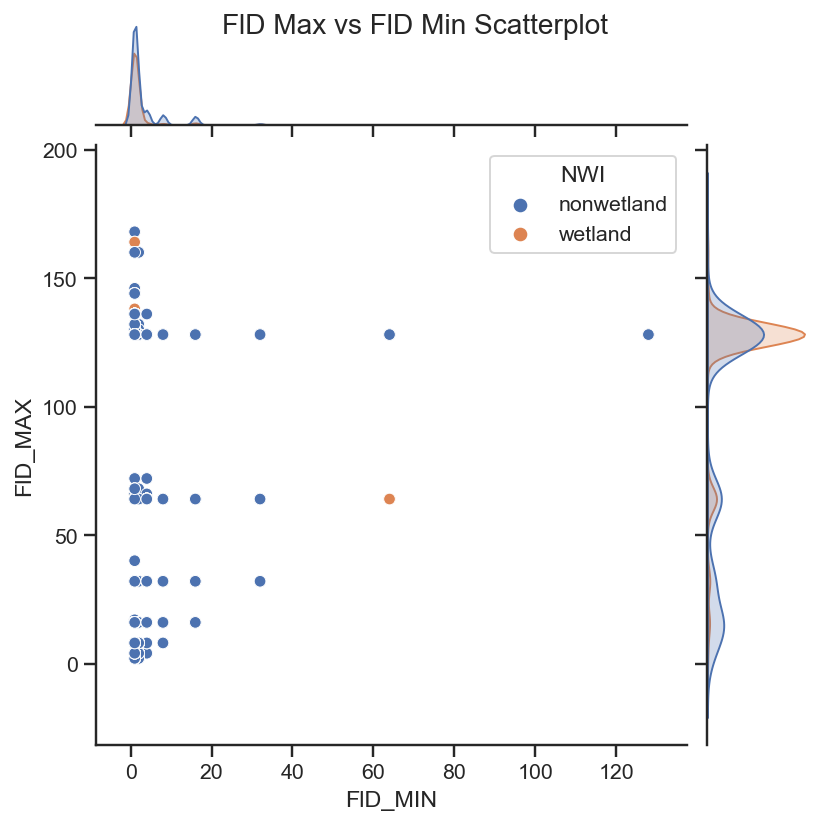

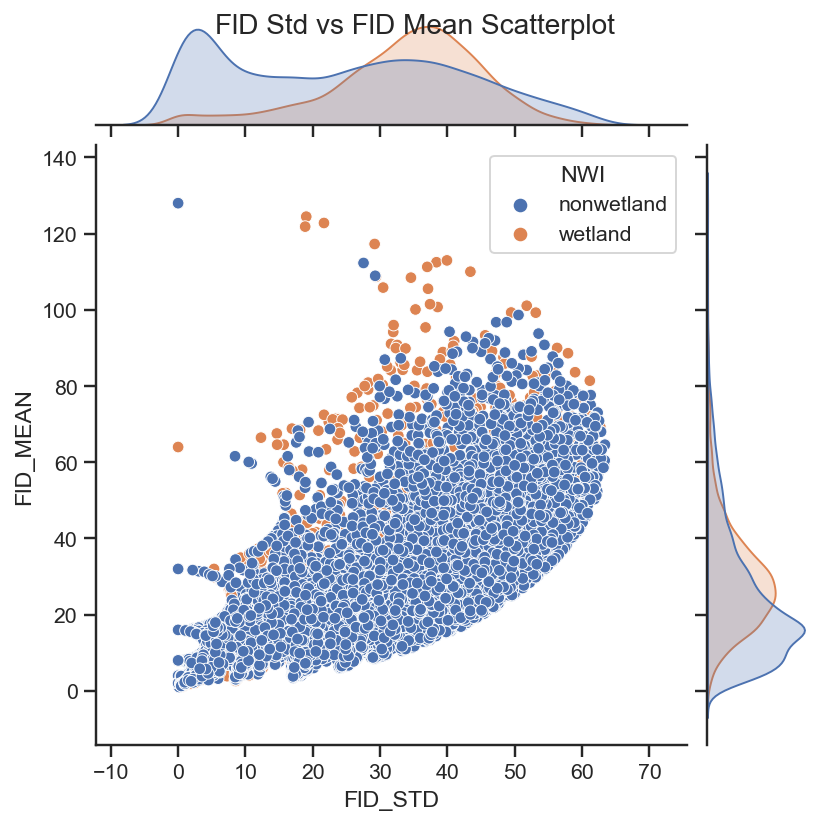

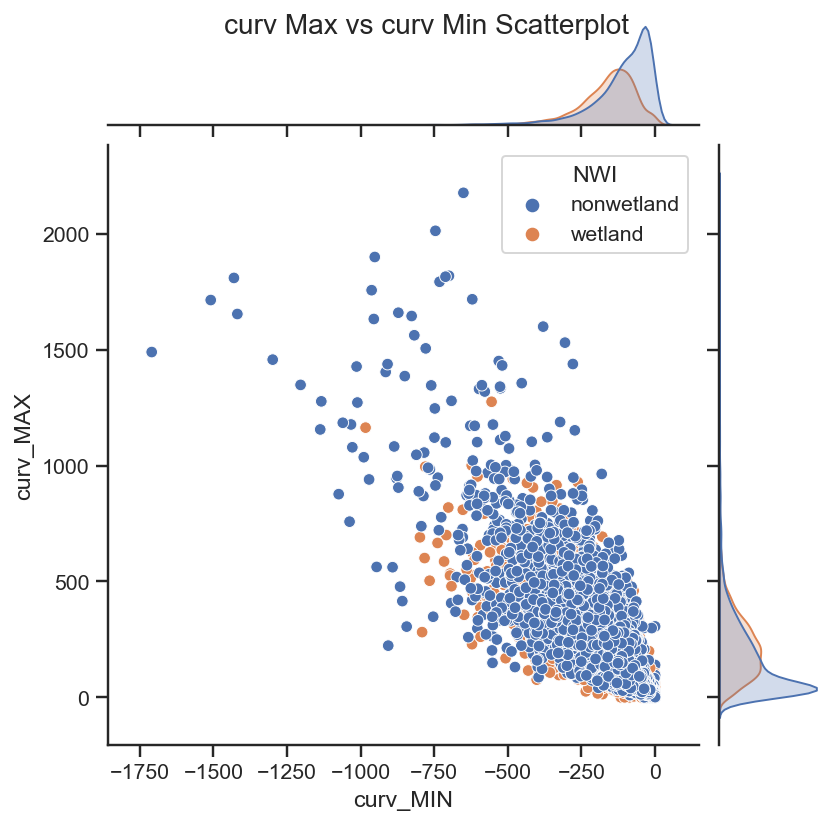

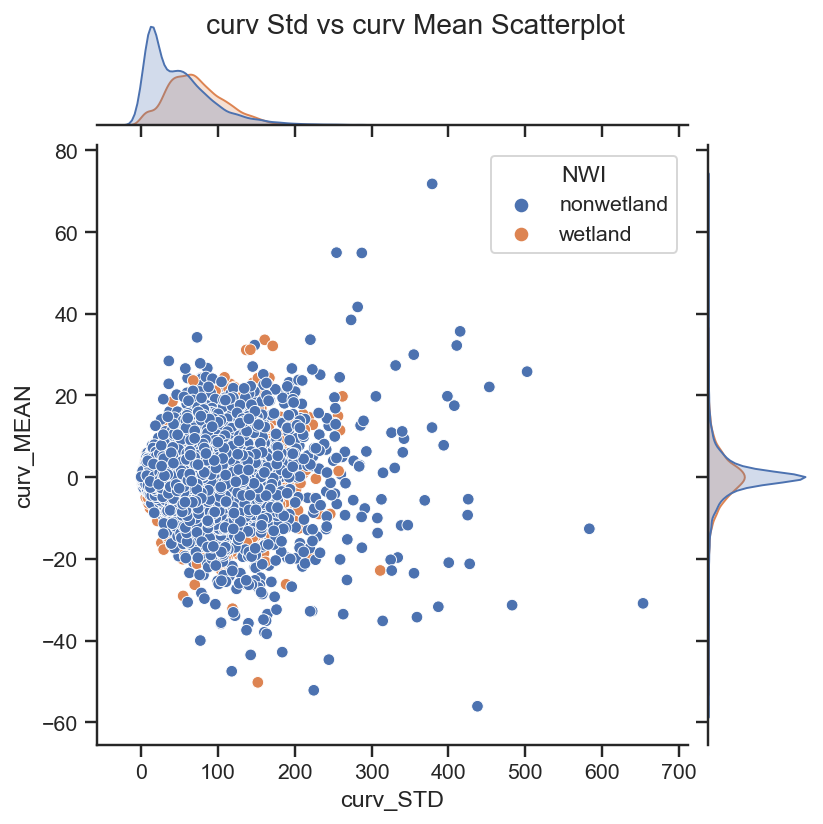

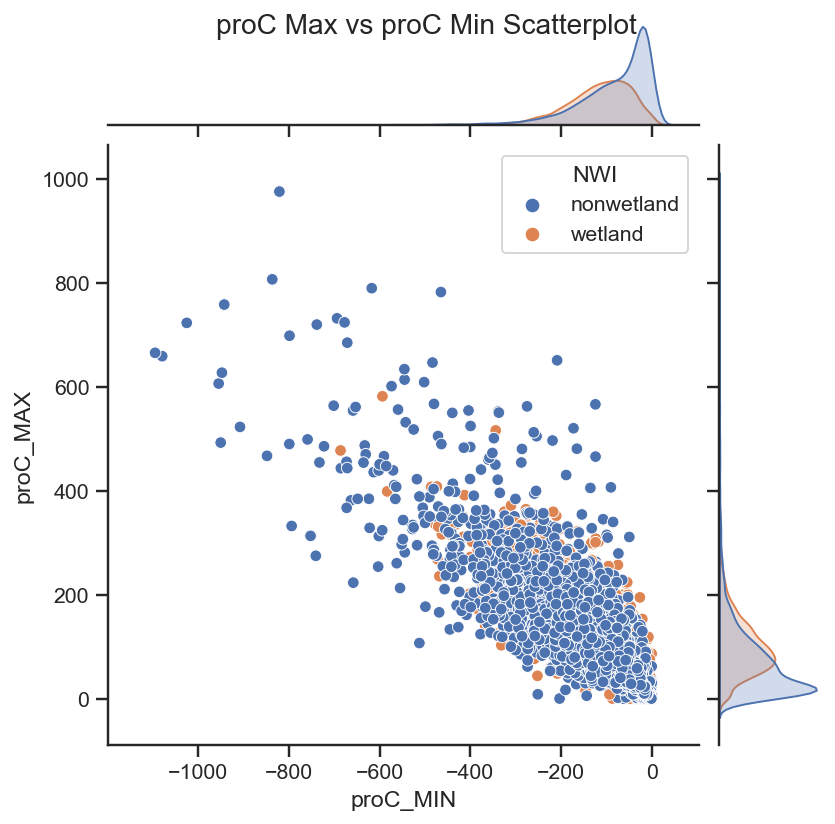

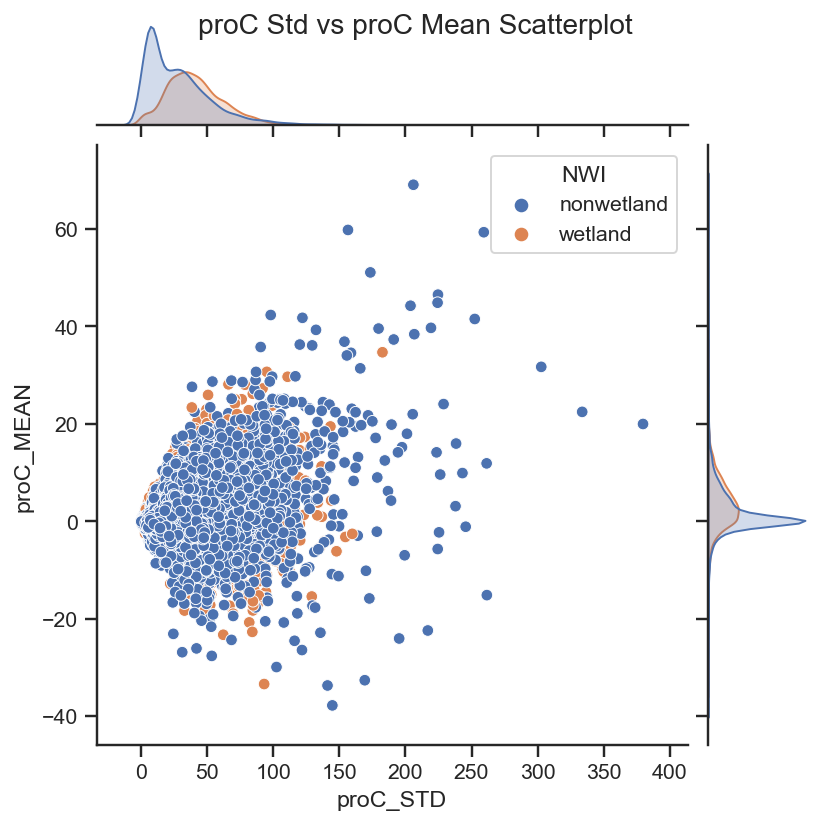

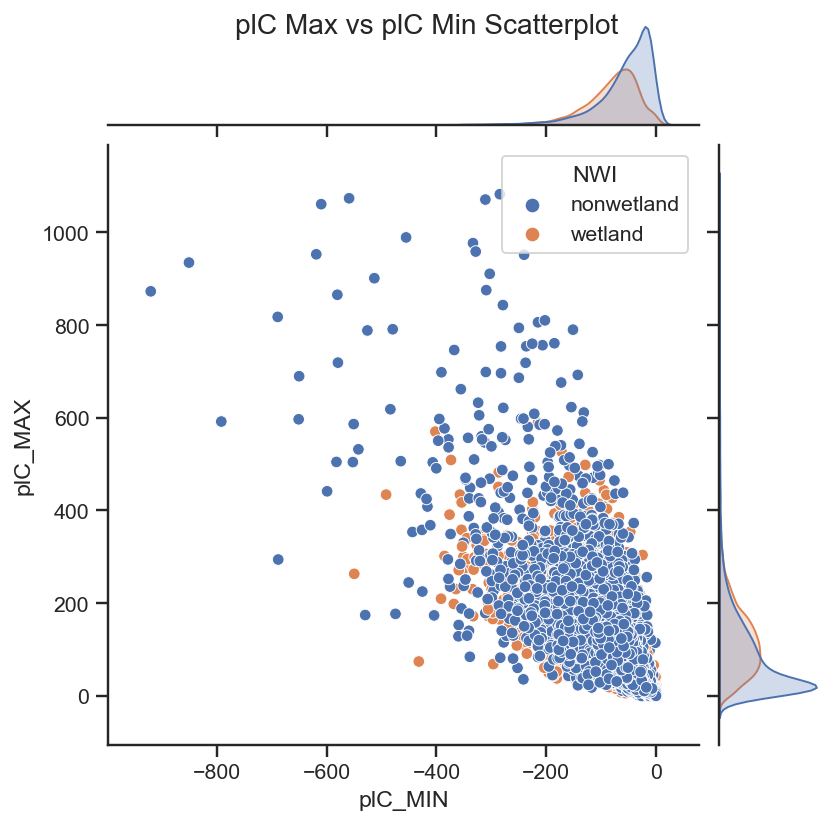

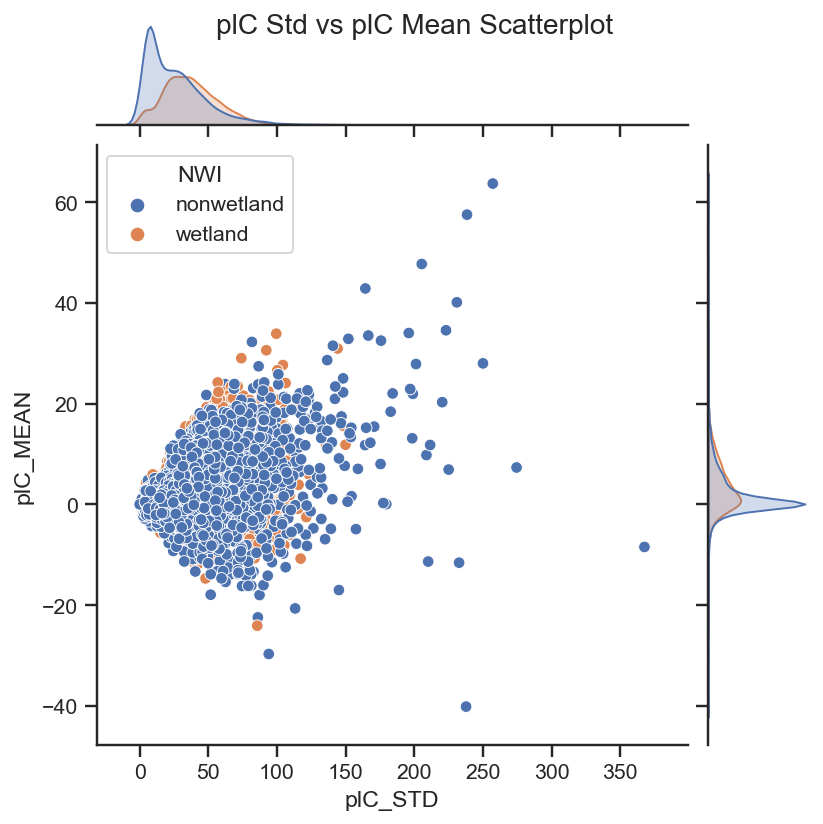

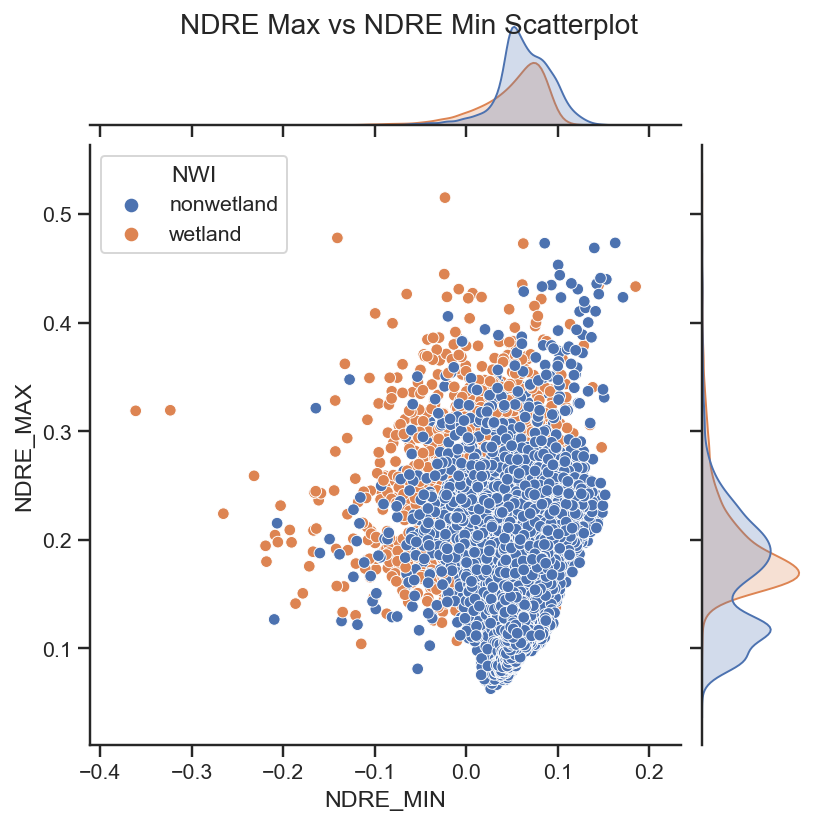

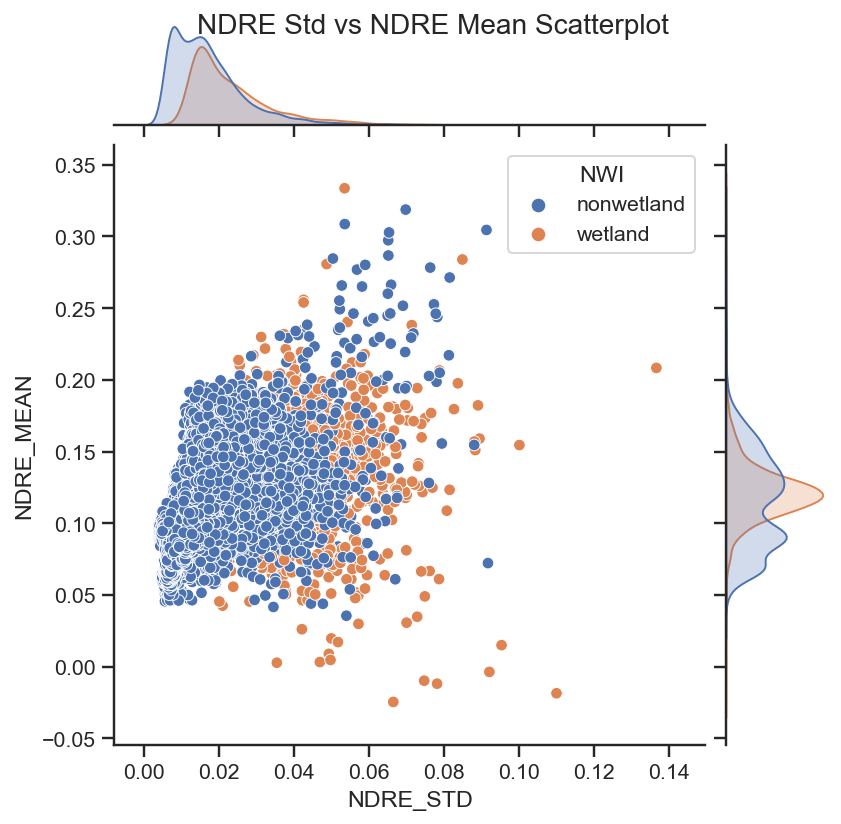

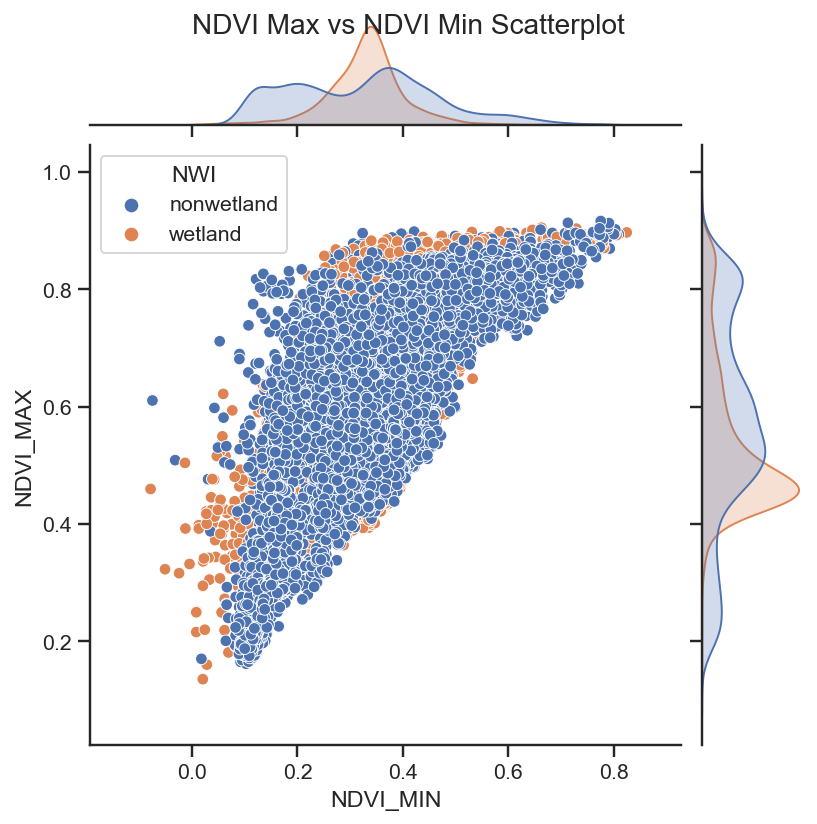

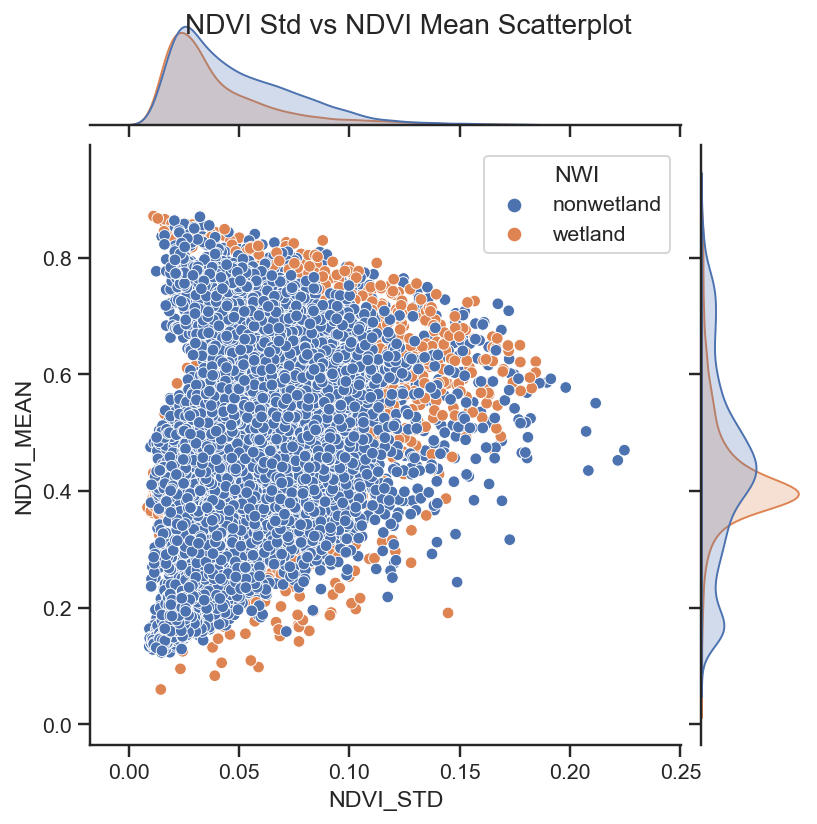

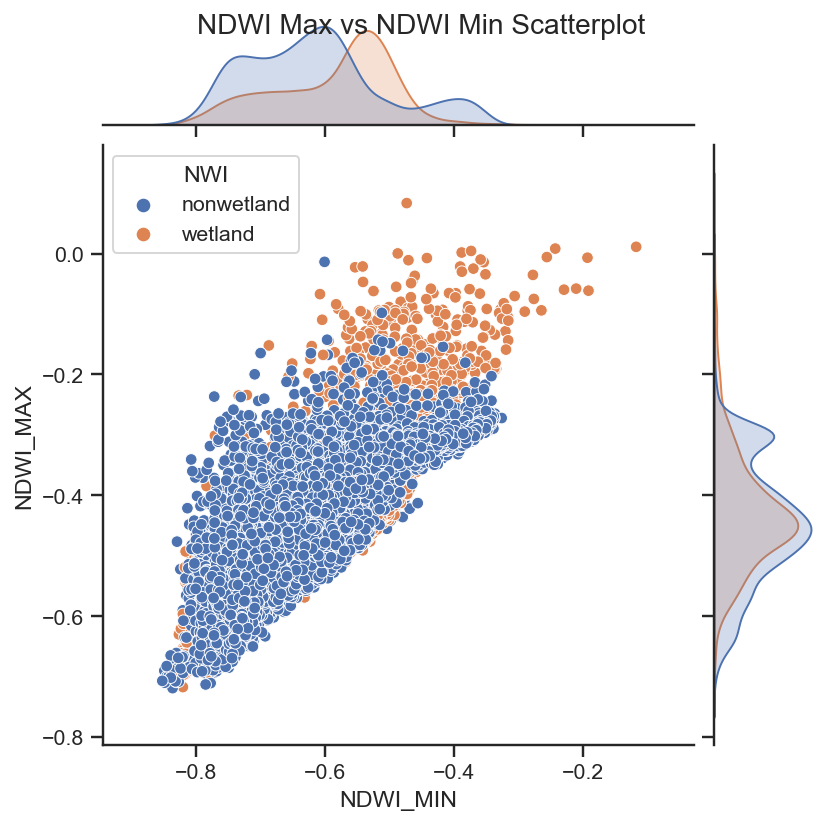

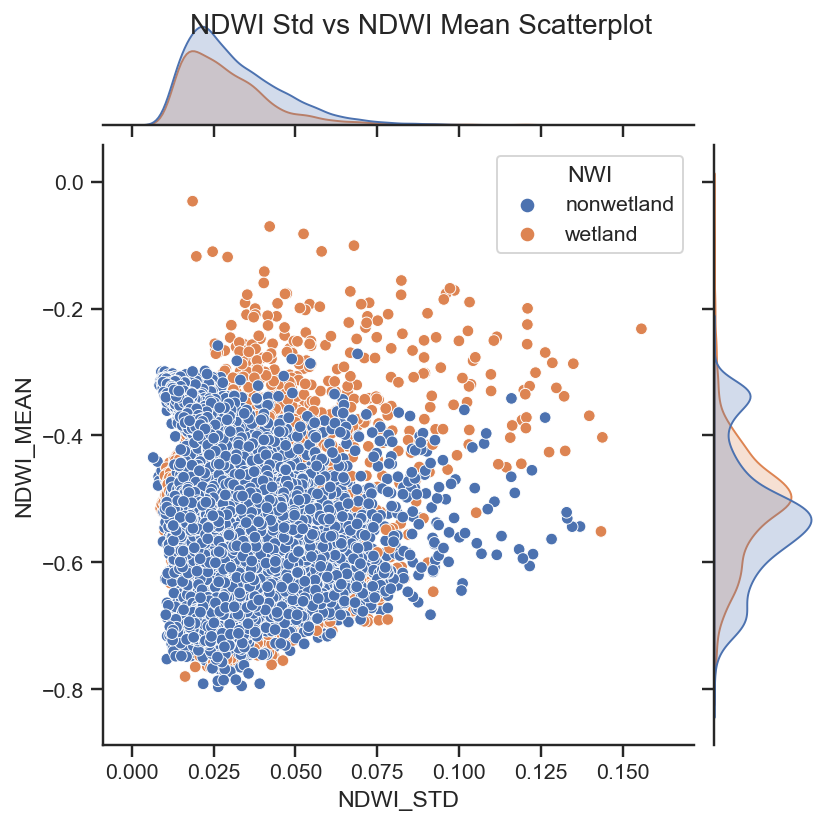

In [7]:
for(columnName, columnData) in dfes.iteritems():
    if("MIN" in columnName):
        columnName = columnName.split('_')[0]
        g1 = jpt(dfes, f"{columnName}_MIN", f"{columnName}_MAX", "NWI", f"{columnName} Max vs {columnName} Min Scatterplot")
        g2 = jpt(dfes, f"{columnName}_STD", f"{columnName}_MEAN", "NWI", f"{columnName} Std vs {columnName} Mean Scatterplot")
        g1.savefig(f'../Images/JointPlots/{columnName}MinMax.jpg')
        g2.savefig(f'../Images/JointPlots/{columnName}MeanStd.jpg')